In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df=pd.read_csv("/home/chaudha4/Projects/pyprojects/python-projects/data_analysis/ch04-time-series-visualizer/fcc-forum-pageviews.csv",
              parse_dates=True,
              index_col=0)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [41]:
# Clean the data by filtering out days when the page views were 
# in the top 2.5% of the dataset or bottom 2.5% of the dataset

print(df.value.quantile(0.025))
print(df.value.quantile(0.975))
df1 = df [(df.value >= df.value.quantile(0.025)) & (df.value <= df.value.quantile(0.975))]
df1

17876.4
177613.075


,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [47]:
# rename the index
df1 = df1.rename_axis("Date")


# rename the column
df1 = df1.rename(columns={"value": "Page Views"})
df1

,Page Views
Date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


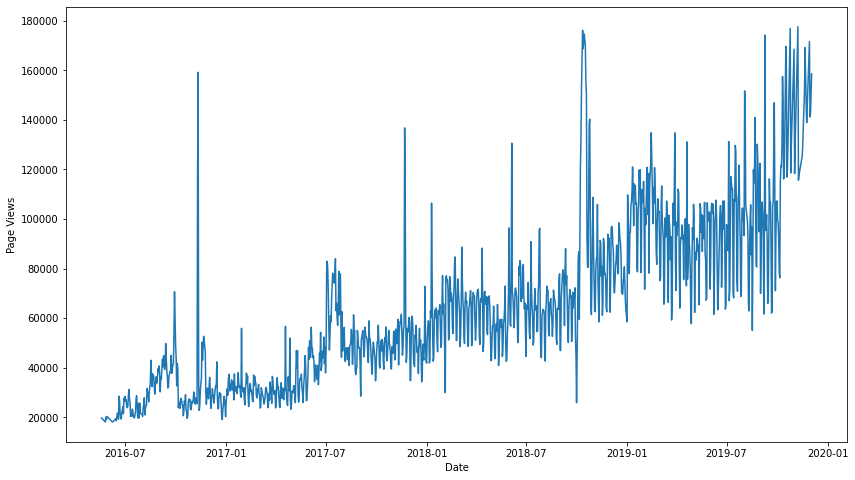

In [64]:
# Set the plot size
plt.figure(figsize=(14, 8))

# Now draw it.
ax = sns.lineplot(x=df1.index, y="Page Views", data=df1)




Figure(432x288)


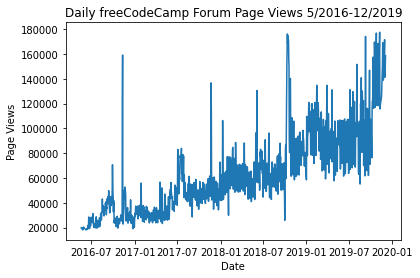

In [72]:
# Use the column 0 instead of its name
fig, axs = plt.subplots(1, 1)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax = sns.lineplot(x=df1.index, y=df1.columns[0], data=df1)
